In [156]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(11.7,8.27)})
#%matplotlib inline

In [157]:
wine_data_filepath = 'winequality.csv'
# read the file
wd = pd.read_csv(wine_data_filepath)
# clean column names
wd.columns = [col.replace(' ', '_').lower() for col in wd.columns]
# it was previously detected that alcohol values were strings, so convert it to numeric, 
# forcing nan where appliable
wd.alcohol = pd.to_numeric(wd.alcohol, errors='coerce')
print wd.isna().sum()
# remove any nan rows
wd = wd.dropna()
# check if no nan persists
print '----------x-------------'
print wd.isna().sum()
print '----------x-------------'
wd.info()
print '----------x-------------'
wd.describe()
print np.shape(wd)

type                     0
fixed_acidity            0
volatile_acidity         0
citric_acid              0
residual_sugar           0
chlorides                0
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
ph                       0
sulphates                0
alcohol                 40
quality                  0
dtype: int64
----------x-------------
type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
----------x-------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6496
Data columns (total 13 columns):
type                    6457 non-null object
fixed_acidity           6457 non-null float64
volatile_acidity        6457 non-null

In [158]:
# change type to categorical
wd['type'] = pd.Categorical(wd['type'])
# get dummies and replace
type_dummies = pd.get_dummies(wd.type, dtype='float', prefix='type')
wd_one_hot_encoding = pd.concat([type_dummies, wd], axis=1).drop(['type'], axis=1)
wd = wd_one_hot_encoding
wd.head()


,type_Red,type_White,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0.0,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0.0,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


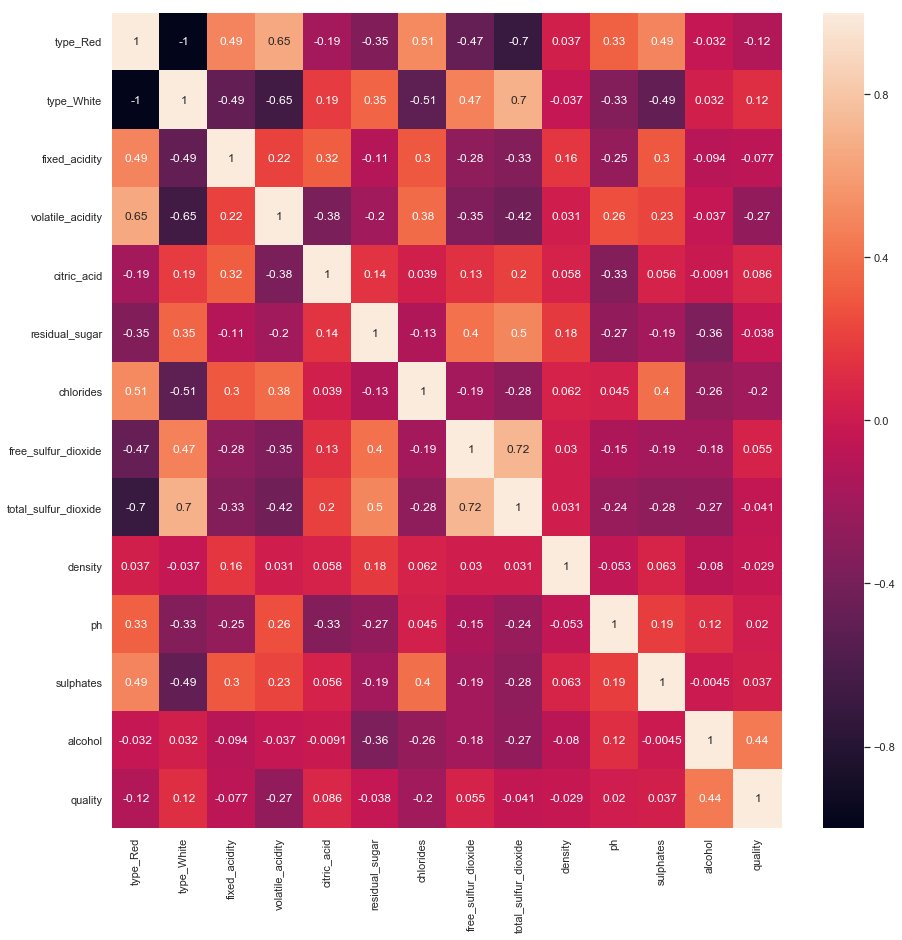

In [159]:
# plot a correlation matrix #

sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(wd.corr(), annot=True)

In [160]:
# Selecting inputs with higher correlation for posterior analysis

#============####=============#
inputs = ['type_Red', 'type_White', 'fixed_acidity', 
          'volatile_acidity', 'citric_acid', 'residual_sugar', 
          'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
          'density', 'ph', 'sulphates', 'alcohol']
select_inputs = ['type_Red', 'type_White', 
          'volatile_acidity', 
          'chlorides', 'alcohol']
outputs = ['quality']

ValueError: max must be larger than min in range parameter.

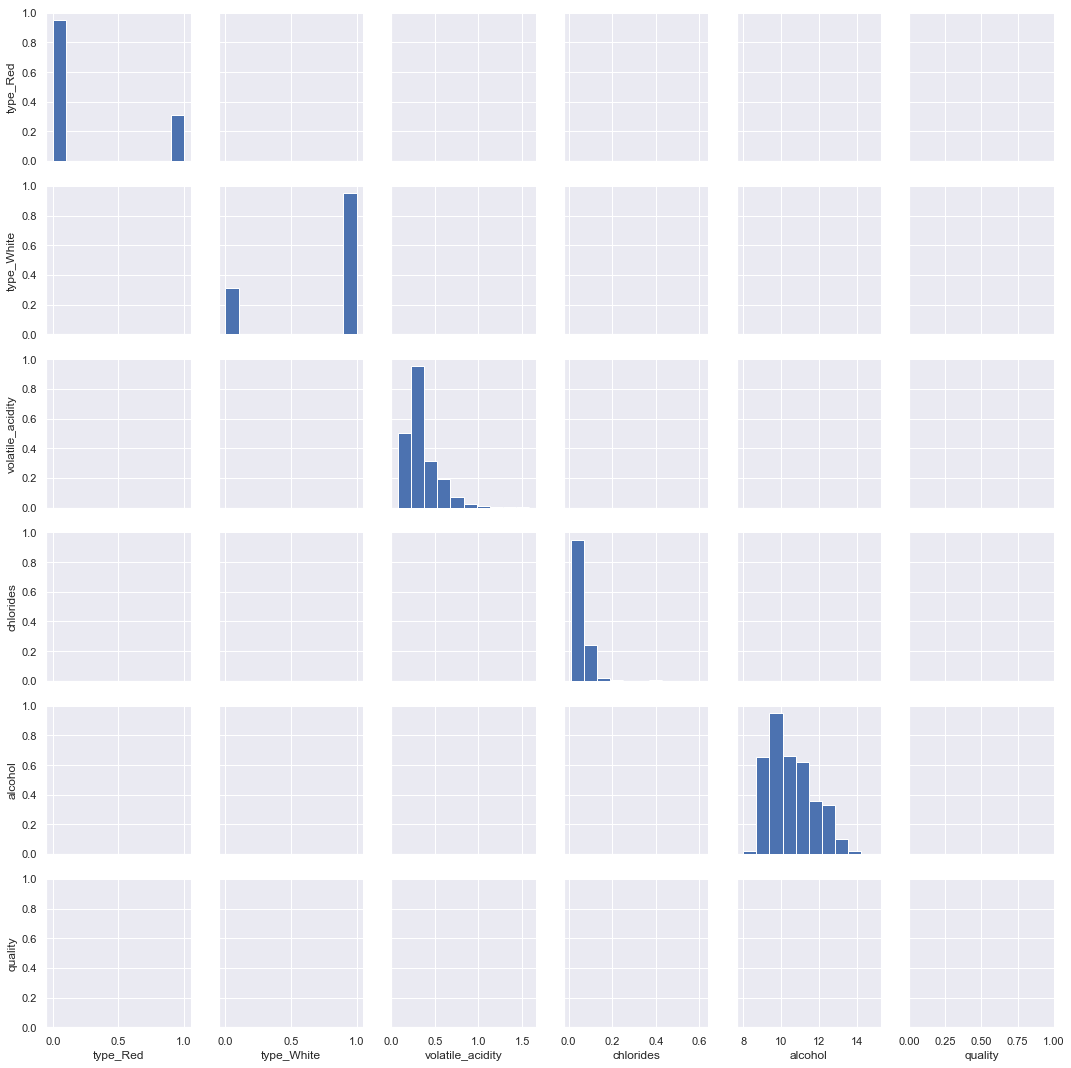

In [198]:
## pair plot selected features for possible use on neural network or linear regression

sns.set(rc={'figure.figsize':(20,20)})
sns.pairplot(pd.DataFrame(wd, columns=select_inputs+outputs))

In [ ]:
# analysis of possible different classifications of red and white whine

white_wd = wd[wd.type_White == 1]
#white_wd = wd[wd.type == 'White']
white_wd.describe()

In [163]:
red_wd = wd[wd.type_Red == 1]
#red_wd = wd[wd.type == 'Red']
red_wd.describe()

,type_Red,type_White,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1593.0,1593.0,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,1.0,0.0,8.319523,0.527476,0.271161,2.538010,0.087501,15.875706,46.391714,2.213269,3.311224,0.658054,10.422379,5.634024
std,0.0,0.0,1.738144,0.179059,0.194954,1.409835,0.047140,10.466847,32.885012,9.681967,0.154190,0.169692,1.063917,0.808107
min,1.0,0.0,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,1.0,0.0,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,1.0,0.0,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1.0,0.0,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997840,3.400000,0.730000,11.100000,6.000000
max,1.0,0.0,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369000,4.010000,2.000000,14.900000,8.000000


In [ ]:
## correlation matrix for white whine

sns.heatmap(white_wd.corr(), annot=True)

In [ ]:
## correlation matrix for red whine

sns.heatmap(red_wd.corr(), annot=True)

In [166]:
from random import randint, uniform, gauss 
from random import uniform

In [167]:
# evaluation function -- root mean square and mean absolute error

def rmse_and_mae(target, prediction):
    target = np.array(target, dtype=float)
    prediction = np.array(prediction, dtype=int)
    
    quad_err_list = (target-prediction)**2
    avg_err_list = np.abs(target-prediction)
    
    rmse = np.sqrt(np.mean(quad_err_list))
    mae = np.mean(avg_err_list)
    return rmse, mae

In [168]:
def uniform_random(X, min_val, max_val, scaled=False, tests=10):
    results_rmse = []
    results_mae = []
    
    def make_pred():
        return max_val*randint(0, 100)/float(100)
    
    for i in range(1,tests+1):
        pred_vector = [int(make_pred()) if not scaled else make_pred() for i in range(len(X))]
        
        rmse, mae = rmse_and_mae(X, pred_vector)
        
        print 'Test {}'.format(i), ' || {:.2f} || {:.2f}'.format(rmse, mae)
        results_rmse.append(rmse)
        results_mae.append(mae)

    return results_rmse, results_mae
    
def normal_random(X, mu, sigma, scaled=False, tests=10):
    results_rmse = []
    results_mae = []
    for i in range(1,tests+1):
        pred_vector = [int(gauss(mu, sigma)) if not scaled else gauss(mu, sigma) for i in range(len(X))] 
        rmse, mae = rmse_and_mae(X, pred_vector)
        
        print 'Test {}'.format(i), ' || {:.2f} || {:.2f}'.format(rmse, mae)
        results_rmse.append(rmse)
        results_mae.append(mae)

    return results_rmse, results_mae

## A predictive model should give better results than random choice. Here there are two models: 
## Random Choice using a uniform distribution (each possible output has the same probability)
## Random Choice using a normal distribution, with the same mean and standard deviation from original output domain


In [169]:


def eval_model(X, scaled=False):    
    min_val = min(min(X), 0)
    max_val = 10 if max(X) >= 3 else 1
    mu = np.mean(X)
    sigma = np.std(X)
    print 'min, max', min_val, max_val
    print 'mu, sigma', mu, sigma
    print ''
    print "Using Random Uniform Distribution"
    results_rmse_uniform, results_mae_uniform = uniform_random(X, min_val, max_val, scaled)
    print "Average RMSE: {:.2f}, StDev RMSE: {:.2f}".format(np.mean(results_rmse_uniform), np.std(results_rmse_uniform))
    print "Average MAE: {:.2f}, StDev MAE: {:.2f}".format(np.mean(results_mae_uniform), np.std(results_mae_uniform))
    print
    print '-----xxxx------' 
    print
    print "Using Random Normal Distribution"
    results_rmse_normal, results_mae_normal = normal_random(X, mu, sigma, scaled)
    print "Average RMSE: {:.2f}, StDev RMSE: {:.2f}".format(np.mean(results_rmse_normal), np.std(results_rmse_normal))
    print "Average MAE: {:.2f}, StDev MAE: {:.2f}".format(np.mean(results_mae_normal), np.std(results_mae_normal))
    

In [170]:
X = pd.DataFrame(wd, columns=outputs)
X = np.array(X).flatten()
eval_model(X)

min, max 0 10
mu, sigma 5.81709772340096 0.8740571513793736

Using Random Uniform Distribution
Test 6456  || 3.30 || 2.74
Test 6456  || 3.33 || 2.78
Test 6456  || 3.27 || 2.73
Test 6456  || 3.32 || 2.78
Test 6456  || 3.32 || 2.77
Test 6456  || 3.31 || 2.76
Test 6456  || 3.27 || 2.72
Test 6456  || 3.32 || 2.76
Test 6456  || 3.30 || 2.74
Test 6456  || 3.28 || 2.73
Average RMSE: 3.30, StDev RMSE: 0.02
Average MAE: 2.75, StDev MAE: 0.02

-----xxxx------

Using Random Normal Distribution
Test 6456  || 1.38 || 1.05
Test 6456  || 1.38 || 1.05
Test 6456  || 1.38 || 1.04
Test 6456  || 1.38 || 1.04
Test 6456  || 1.38 || 1.04
Test 6456  || 1.37 || 1.04
Test 6456  || 1.35 || 1.03
Test 6456  || 1.35 || 1.01
Test 6456  || 1.37 || 1.04
Test 6456  || 1.38 || 1.04
Average RMSE: 1.37, StDev RMSE: 0.01
Average MAE: 1.04, StDev MAE: 0.01


# An outlier analysis would take out 8% of data, but those data points are not influential in this case

In [171]:


#### OUTLIER ANALYSIS ###
#from scipy import stats
#z_score = np.abs(stats.zscore(wd))
#print wd.shape
#threshold = 3 # 3 standard deviations
#wd_filtered = wd[(z_score < threshold).all(axis=1)]
#print wd_filtered.shape
#print 100-(wd_filtered.shape[0]*100/float(wd.shape[0]))

In [172]:
#X_filtered = pd.DataFrame(wd_filtered, columns=outputs)
#X_filtered = np.array(X_filtered).flatten()
#eval_model(X_filtered)

In [173]:
### SCALING ###
scaler = MinMaxScaler((0,1))
scaled_wd = scaler.fit_transform(wd)
scaled_wd = pd.DataFrame(scaled_wd, columns=wd.columns)
scaled_wd.head()

,type_Red,type_White,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.000135,0.217054,0.129213,0.115942,0.5
1,0.0,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.000067,0.449612,0.151685,0.217391,0.5
2,0.0,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.000078,0.418605,0.123596,0.304348,0.5
3,0.0,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.000082,0.364341,0.101124,0.275362,0.5
4,0.0,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.000082,0.364341,0.101124,0.275362,0.5


In [174]:
#### REGRESSION MODEL ###
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor


In [175]:
X = pd.DataFrame(wd, columns=select_inputs).values
y = pd.DataFrame(wd, columns=outputs).values
print X.shape

(6457, 5)


In [176]:
print y[:15]


[[6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [7]
 [5]]


In [177]:
scores = {'lm':[], 'nn':[]}
kfold = KFold(n_splits=15, shuffle=False)

# Using a kfold (15 splits) to evaluate a linear regression model 

In [178]:
def linear_regression_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)    
    score = model.score(X_test, y_test)    
    y_pred = model.predict(X_test)
    
    rmse, mae = rmse_and_mae(y_test, y_pred)    

    return {'model': model, 'score': score, 'rmse': rmse, 'mae': mae}

for i, (train, test) in enumerate(kfold.split(X, y)):

    X_train = X[train,:]
    X_test = X[test,:]
    
    y_train = y[train,:]
    y_test = y[test,:]
    
    result_lm = linear_regression_model(X_train, X_test, y_train, y_test)
    scores['lm'].append(result_lm)   
    
print 'Linear Model'
for s in scores['lm']:
    print "Model Score: {:.2f}, MAE: {:.2f}, RMSE: {:.2f}".format(s.get('score'), s.get('mae'), s.get('rmse'))
print '-x-'
print 'Average RMSE: {:.2f}, Average MAE: {:.2f}'.format(np.mean([s.get('rmse') for s in scores['lm']]),
                                                          np.mean([s.get('mae') for s in scores['lm']]))

Linear Model
Model Score: 0.22, MAE: 0.72, RMSE: 0.98
Model Score: 0.20, MAE: 0.81, RMSE: 1.12
Model Score: 0.23, MAE: 0.79, RMSE: 1.07
Model Score: 0.22, MAE: 0.70, RMSE: 0.98
Model Score: 0.16, MAE: 0.58, RMSE: 0.86
Model Score: 0.22, MAE: 0.63, RMSE: 0.91
Model Score: 0.30, MAE: 0.67, RMSE: 0.94
Model Score: 0.21, MAE: 0.65, RMSE: 0.91
Model Score: 0.31, MAE: 0.68, RMSE: 0.95
Model Score: 0.21, MAE: 0.56, RMSE: 0.84
Model Score: 0.10, MAE: 0.52, RMSE: 0.83
Model Score: 0.31, MAE: 0.57, RMSE: 0.84
Model Score: 0.25, MAE: 0.65, RMSE: 0.92
Model Score: 0.36, MAE: 0.63, RMSE: 0.86
Model Score: 0.26, MAE: 0.55, RMSE: 0.81
-x-
Average RMSE: 0.92, Average MAE: 0.65


# Using kfold (15 splits) to evaluate a simple neural network

In [179]:
def neural_network_model(X_train, X_test, y_train, y_test):
    model = MLPRegressor(hidden_layer_sizes=(32, 64, 128, 32), activation='relu', solver='adam', alpha=0.0001, 
                         batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                         verbose=False)
    
    model.fit(X_train, np.ravel(y_train))
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    rmse, mae = rmse_and_mae(y_test, y_pred)

    return {'model': model, 'score': score, 'rmse': rmse, 'mae': mae}

for i, (train, test) in enumerate(kfold.split(X, y)):
    
    X_train = X[train,:]
    X_test = X[test,:]
    
    y_train = y[train,:]
    y_test = y[test,:]
    
    result_nn = neural_network_model(X_train, X_test, y_train, y_test)
    scores['nn'].append(result_nn)   
    
print 'NN Model'
for s in scores['nn']:
    print "Model Score: {:.2f}, MAE: {:.2f}, RMSE: {:.2f}".format(s.get('score'), s.get('mae'), s.get('rmse'))
print '-x-'
print 'Average RMSE: {:.2f}, Average MAE: {:.2f}'.format(np.mean([s.get('rmse') for s in scores['nn']]),
                                                  np.mean([s.get('mae') for s in scores['nn']]))

NN Model
Model Score: 0.18, MAE: 0.88, RMSE: 1.18
Model Score: 0.22, MAE: 0.91, RMSE: 1.23
Model Score: 0.21, MAE: 0.97, RMSE: 1.27
Model Score: 0.22, MAE: 0.92, RMSE: 1.21
Model Score: 0.15, MAE: 0.72, RMSE: 1.01
Model Score: 0.19, MAE: 0.78, RMSE: 1.06
Model Score: 0.23, MAE: 0.94, RMSE: 1.25
Model Score: 0.20, MAE: 0.78, RMSE: 1.09
Model Score: 0.31, MAE: 0.86, RMSE: 1.15
Model Score: 0.17, MAE: 0.75, RMSE: 1.01
Model Score: 0.09, MAE: 0.72, RMSE: 1.00
Model Score: 0.31, MAE: 0.74, RMSE: 1.04
Model Score: 0.22, MAE: 0.81, RMSE: 1.12
Model Score: 0.35, MAE: 0.86, RMSE: 1.14
Model Score: 0.28, MAE: 0.74, RMSE: 1.03
-x-
Average RMSE: 1.12, Average MAE: 0.83


# Trying another neural network, but this time using Keras, for more flexibility

In [180]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import RMSprop
from keras.optimizers import adam
from keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split



In [181]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model
print baseline_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_242 (Dense)            (None, 32)                192       
_________________________________________________________________
dense_243 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_244 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_245 (Dense)            (None, 1)                 9         
Total params: 2,833
Trainable params: 2,833
Non-trainable params: 0
_________________________________________________________________
None


In [182]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=5, verbose=1)

In [183]:
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(estimator, X, y, cv=kfold, n_jobs=1)
print results


Epoch 1/20
5811/5811 [==============================] - 13s 2ms/step - loss: 0.8708
Epoch 2/20
5811/5811 [==============================] - 5s 877us/step - loss: 0.6182
Epoch 3/20
5811/5811 [==============================] - 6s 1ms/step - loss: 0.6103
Epoch 4/20
5811/5811 [==============================] - 7s 1ms/step - loss: 0.6081
Epoch 5/20
5811/5811 [==============================] - 5s 881us/step - loss: 0.6034
Epoch 6/20
5811/5811 [==============================] - 6s 1ms/step - loss: 0.6023
Epoch 7/20
5811/5811 [==============================] - 5s 805us/step - loss: 0.5991
Epoch 8/20
5811/5811 [==============================] - 5s 815us/step - loss: 0.5979
Epoch 9/20
5811/5811 [==============================] - 5s 915us/step - loss: 0.6029
Epoch 10/20
5811/5811 [==============================] - 8s 1ms/step - loss: 0.5983
Epoch 11/20
5811/5811 [==============================] - 6s 1ms/step - loss: 0.5967
Epoch 12/20
5811/5811 [==============================] - 7s 1ms/step - los

5811/5811 [==============================] - 8s 1ms/step - loss: 0.5938
Epoch 17/20
5811/5811 [==============================] - 8s 1ms/step - loss: 0.5912
Epoch 18/20
5811/5811 [==============================] - 8s 1ms/step - loss: 0.5933
Epoch 19/20
5811/5811 [==============================] - 8s 1ms/step - loss: 0.5885
Epoch 20/20
646/646 [==============================] - 2s 3ms/step
Epoch 1/20
5811/5811 [==============================] - 11s 2ms/step - loss: 0.9062
Epoch 2/20
5811/5811 [==============================] - 8s 1ms/step - loss: 0.6206
Epoch 3/20
5811/5811 [==============================] - 8s 1ms/step - loss: 0.6081
Epoch 4/20
5811/5811 [==============================] - 8s 1ms/step - loss: 0.6078
Epoch 5/20
5811/5811 [==============================] - 8s 1ms/step - loss: 0.6077
Epoch 6/20
5811/5811 [==============================] - 8s 1ms/step - loss: 0.6105
Epoch 7/20
5811/5811 [==============================] - 8s 1ms/step - loss: 0.6054
Epoch 8/20
5811/5811 [=====

5812/5812 [==============================] - 8s 1ms/step - loss: 0.6081
Epoch 11/20
5812/5812 [==============================] - 7s 1ms/step - loss: 0.6082
Epoch 12/20
5812/5812 [==============================] - 8s 1ms/step - loss: 0.6071
Epoch 13/20
5812/5812 [==============================] - 8s 1ms/step - loss: 0.6051
Epoch 14/20
5812/5812 [==============================] - 7s 1ms/step - loss: 0.6063
Epoch 15/20
5812/5812 [==============================] - 6s 1ms/step - loss: 0.6098
Epoch 16/20
5812/5812 [==============================] - 6s 1ms/step - loss: 0.6057
Epoch 17/20
5812/5812 [==============================] - 7s 1ms/step - loss: 0.6062
Epoch 18/20
5812/5812 [==============================] - 7s 1ms/step - loss: 0.6050
Epoch 19/20
5812/5812 [==============================] - 6s 1ms/step - loss: 0.6014
Epoch 20/20
645/645 [==============================] - 2s 4ms/step
[-0.61282573 -0.70091821 -0.6110682  -0.6089721  -0.61485481 -0.58864577
 -0.54662833 -0.56588979 -0.5396

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = baseline_model()
results = model.fit(X_train, y_train, epochs=20, batch_size=10)
y_pred= model.predict(X_test)
print '---xxx---'
print rmse_and_mae(y_test, y_pred)

Epoch 1/20
4519/4519 [==============================] - 7s 2ms/step - loss: 1.1853
Epoch 2/20
4519/4519 [==============================] - 3s 614us/step - loss: 0.6258
Epoch 3/20
4519/4519 [==============================] - 3s 667us/step - loss: 0.6242
Epoch 4/20
4519/4519 [==============================] - 3s 720us/step - loss: 0.6189
Epoch 5/20
4519/4519 [==============================] - 3s 693us/step - loss: 0.6161
Epoch 6/20
4519/4519 [==============================] - 3s 622us/step - loss: 0.6096
Epoch 7/20
4519/4519 [==============================] - 3s 731us/step - loss: 0.6109
Epoch 8/20
4519/4519 [==============================] - 3s 681us/step - loss: 0.6089
Epoch 9/20
4519/4519 [==============================] - 2s 529us/step - loss: 0.6049
Epoch 10/20
4519/4519 [==============================] - 3s 757us/step - loss: 0.6071
Epoch 11/20
4519/4519 [==============================] - 3s 571us/step - loss: 0.6081
Epoch 12/20
4519/4519 [==============================] - 4s 779us

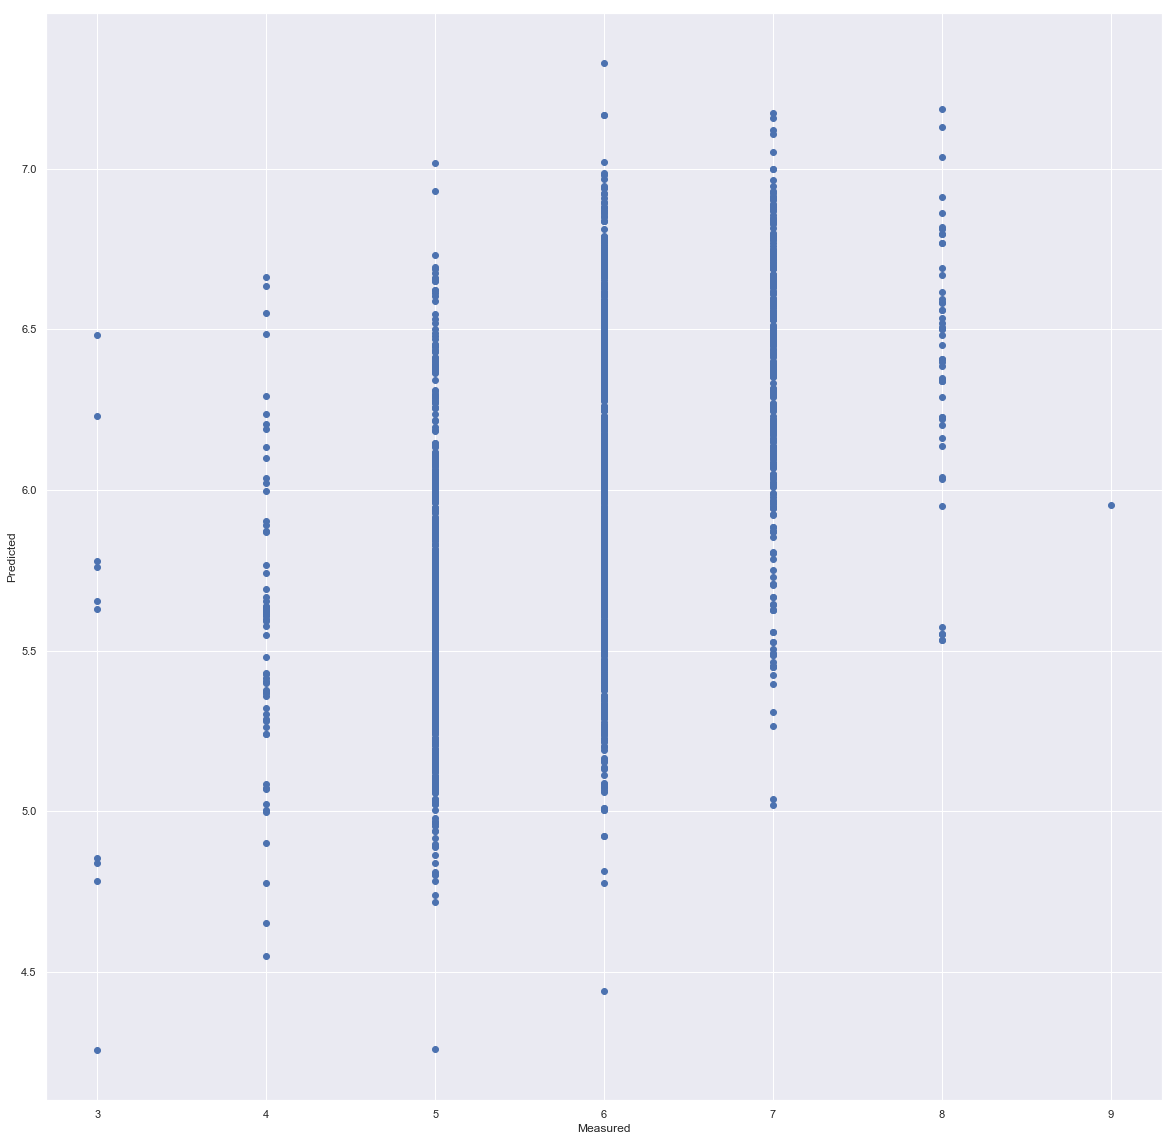

In [185]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
#ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Treating outputs as discrete categories##

In [187]:
wine_data_filepath = '/home/fernandopapi/Desktop/cogni/winequality.csv'
# read the file
wd = pd.read_csv(wine_data_filepath)
# clean column names
wd.columns = [col.replace(' ', '_').lower() for col in wd.columns]
# it was previously detected that alcohol values were strings, so convert it to numeric, 
# forcing nan where appliable
wd.alcohol = pd.to_numeric(wd.alcohol, errors='coerce')
print wd.isna().sum()
# remove any nan rows
wd = wd.dropna()
# check if no nan persists
print '----------x-------------'
print wd.isna().sum()
print '----------x-------------'
wd.info()
print '----------x-------------'
wd.describe()
print np.shape(wd)

type                     0
fixed_acidity            0
volatile_acidity         0
citric_acid              0
residual_sugar           0
chlorides                0
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
ph                       0
sulphates                0
alcohol                 40
quality                  0
dtype: int64
----------x-------------
type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
----------x-------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6496
Data columns (total 13 columns):
type                    6457 non-null object
fixed_acidity           6457 non-null float64
volatile_acidity        6457 non-null

In [188]:
# change type to categorical
wd['type'] = pd.Categorical(wd['type'])
# get dummies and replace
type_dummies = pd.get_dummies(wd.type, dtype='float', prefix='type')
wd_one_hot_encoding = pd.concat([type_dummies, wd], axis=1).drop(['type'], axis=1)
wd = wd_one_hot_encoding
wd.head()

,type_Red,type_White,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0.0,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0.0,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [189]:
# change quality to categorical
print wd.columns
wd['quality'] = pd.Categorical(wd['quality'])
## get dummies and replace
quality_dummies = pd.get_dummies(wd.quality, dtype='int', prefix='quali')
wd_one_hot_encoding = pd.concat([quality_dummies, wd], axis=1).drop(['quality'], axis=1)
#wd = wd_one_hot_encoding
wd_one_hot_encoding.head()

Index([u'type_Red', u'type_White', u'fixed_acidity', u'volatile_acidity',
       u'citric_acid', u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'ph', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')


,quali_3,quali_4,quali_5,quali_6,quali_7,quali_8,quali_9,type_Red,type_White,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,0,0,0,1,0,0,0,0.0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,0,0,0,1,0,0,0,0.0,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,0,0,0,1,0,0,0,0.0,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,0,0,0,1,0,0,0,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,0,0,0,1,0,0,0,0.0,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [190]:
wd = wd_one_hot_encoding
wd.describe()

,quali_3,quali_4,quali_5,quali_6,quali_7,quali_8,quali_9,type_Red,type_White,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
count,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000
mean,0.004646,0.033452,0.329720,0.435961,0.165557,0.029890,0.000774,0.246709,0.753291,7.219475,0.339684,0.318795,5.445973,0.056081,30.495586,115.690801,1.715329,3.218592,0.531169,10.489083
std,0.068009,0.179828,0.470148,0.495920,0.371711,0.170297,0.027819,0.431129,0.431129,1.294910,0.164690,0.145506,4.764308,0.035110,17.757007,56.595196,7.659497,0.160845,0.148870,1.192961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992350,3.110000,0.430000,9.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000


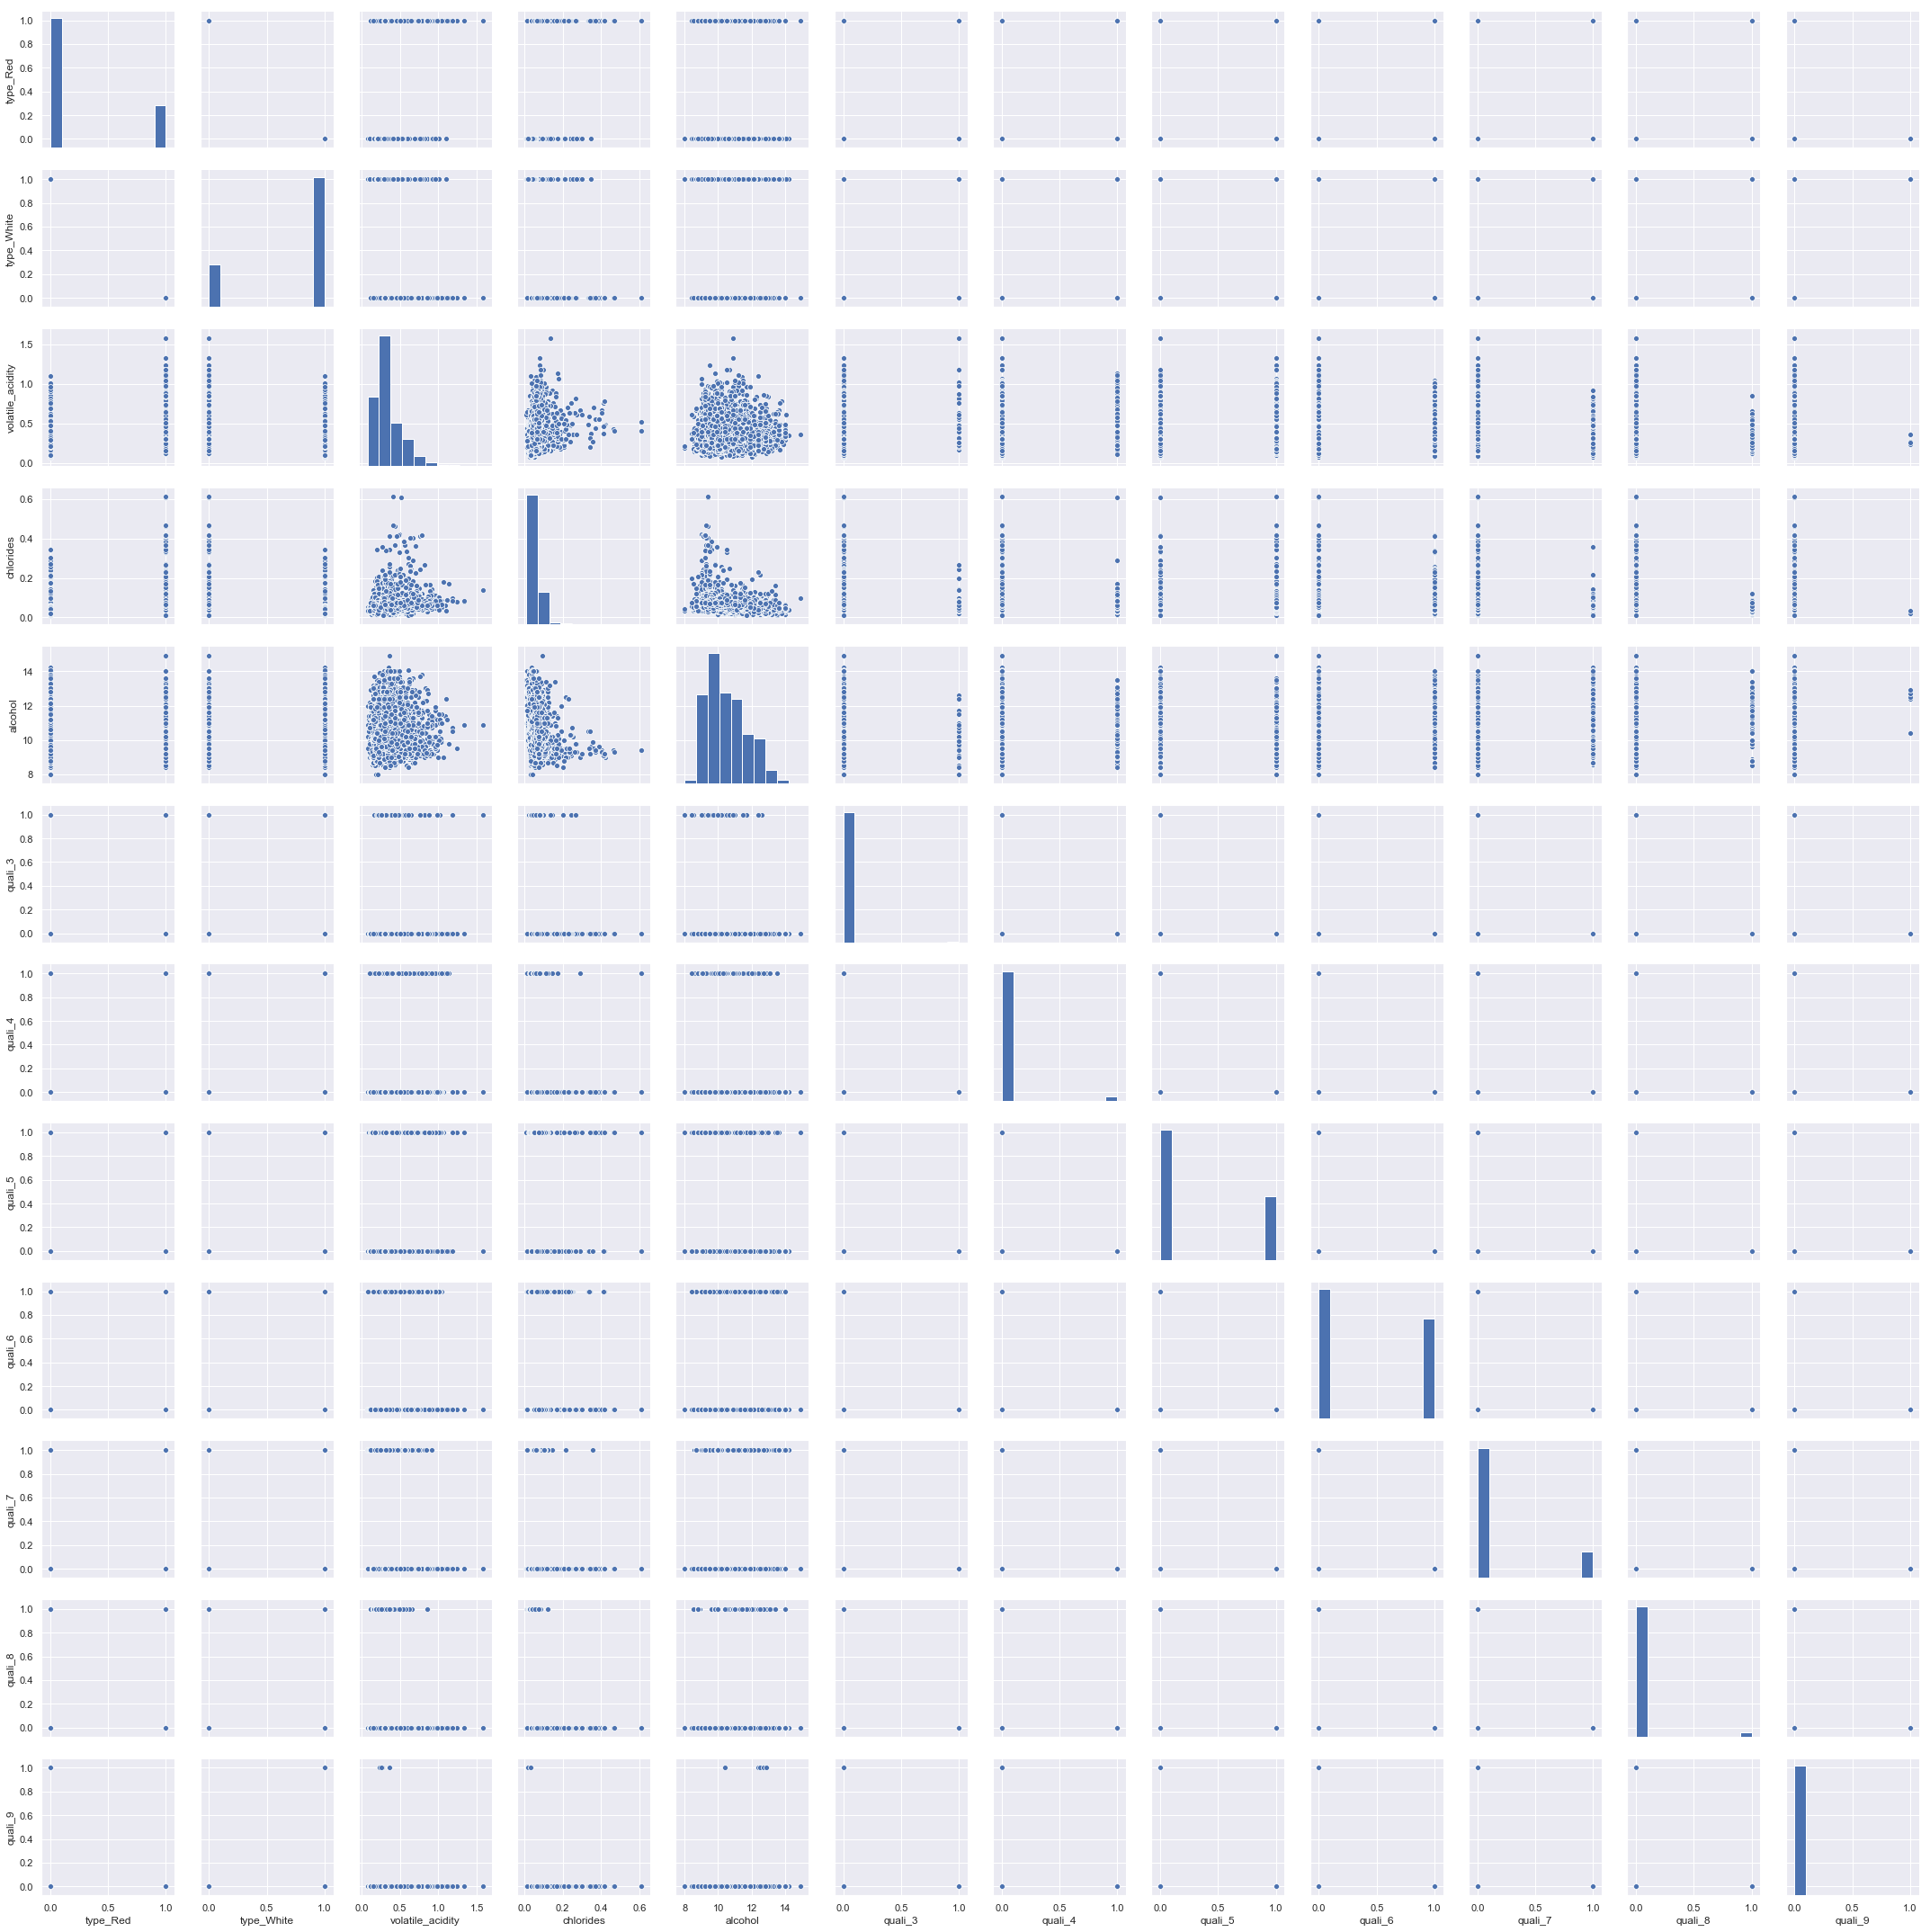

In [191]:
discrete_outputs = ['quali_3', 'quali_4', 'quali_5', 'quali_6', 'quali_7', 'quali_8', 'quali_9']
sns.set(rc={'figure.figsize':(20,20)})
sns.pairplot(pd.DataFrame(wd, columns=select_inputs+discrete_outputs))

In [192]:
X = pd.DataFrame(wd, columns=select_inputs).values
y = pd.DataFrame(wd, columns=discrete_outputs).values

In [193]:
X.shape

(6457, 5)

In [194]:
y.shape

(6457, 7)

In [195]:
def classifier_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=5, kernel_initializer='normal'))
    model.add(Dense(64))
    model.add(Dense(7, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy',  optimizer='sgd', metrics=['accuracy'])
    
    return model
print baseline_model().summary()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


model = classifier_model()
results = model.fit(X_train, y_train, epochs=20, batch_size=10)
print results

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_290 (Dense)            (None, 32)                192       
_________________________________________________________________
dense_291 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_292 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_293 (Dense)            (None, 1)                 9         
Total params: 2,833
Trainable params: 2,833
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
4519/4519 [==============================] - 8s 2ms/step - loss: 1.3293 - acc: 0.4240
Epoch 2/20
4519/4519 [==============================] - 2s 535us/step - loss: 1.2996 - acc: 0.4308
Epoch 3/20
4519/4519 [==============================] - 2s 428us/step -

In [199]:
y_pred= model.predict(X_test)
print y_pred[:10]
y_pred_values = [np.argmax(y)+3 for y in y_pred]
y_test_values = [np.argmax(y)+3 for y in y_test]
print '---xxx---'
print rmse_and_mae(y_test_values, y_pred_values)

[[0.00818822 0.03092178 0.17978162 0.47338074 0.2384422  0.06692782
  0.00235755]
 [0.00973295 0.04577382 0.4352665  0.3945662  0.08660717 0.02551066
  0.0025427 ]
 [0.00922443 0.04465488 0.42529392 0.4035994  0.08953506 0.02534962
  0.00234269]
 [0.00862444 0.04635112 0.6252036  0.27397767 0.03353411 0.01023204
  0.00207711]
 [0.00995423 0.04362928 0.3829716  0.42261901 0.10664313 0.0315576
  0.00262507]
 [0.00848046 0.03203928 0.1902219  0.47276437 0.22894244 0.06510324
  0.00244831]
 [0.0067857  0.02989301 0.18394983 0.48877916 0.23197924 0.05683598
  0.00177709]
 [0.00500507 0.01916307 0.08801659 0.45077083 0.35212794 0.0835413
  0.0013751 ]
 [0.00901095 0.03513382 0.2275511  0.47144488 0.19753318 0.05677306
  0.00255304]
 [0.01003323 0.04359455 0.35331094 0.43147808 0.12239441 0.03641836
  0.00277047]]
---xxx---
(0.8050408780139539, 0.5283797729618163)


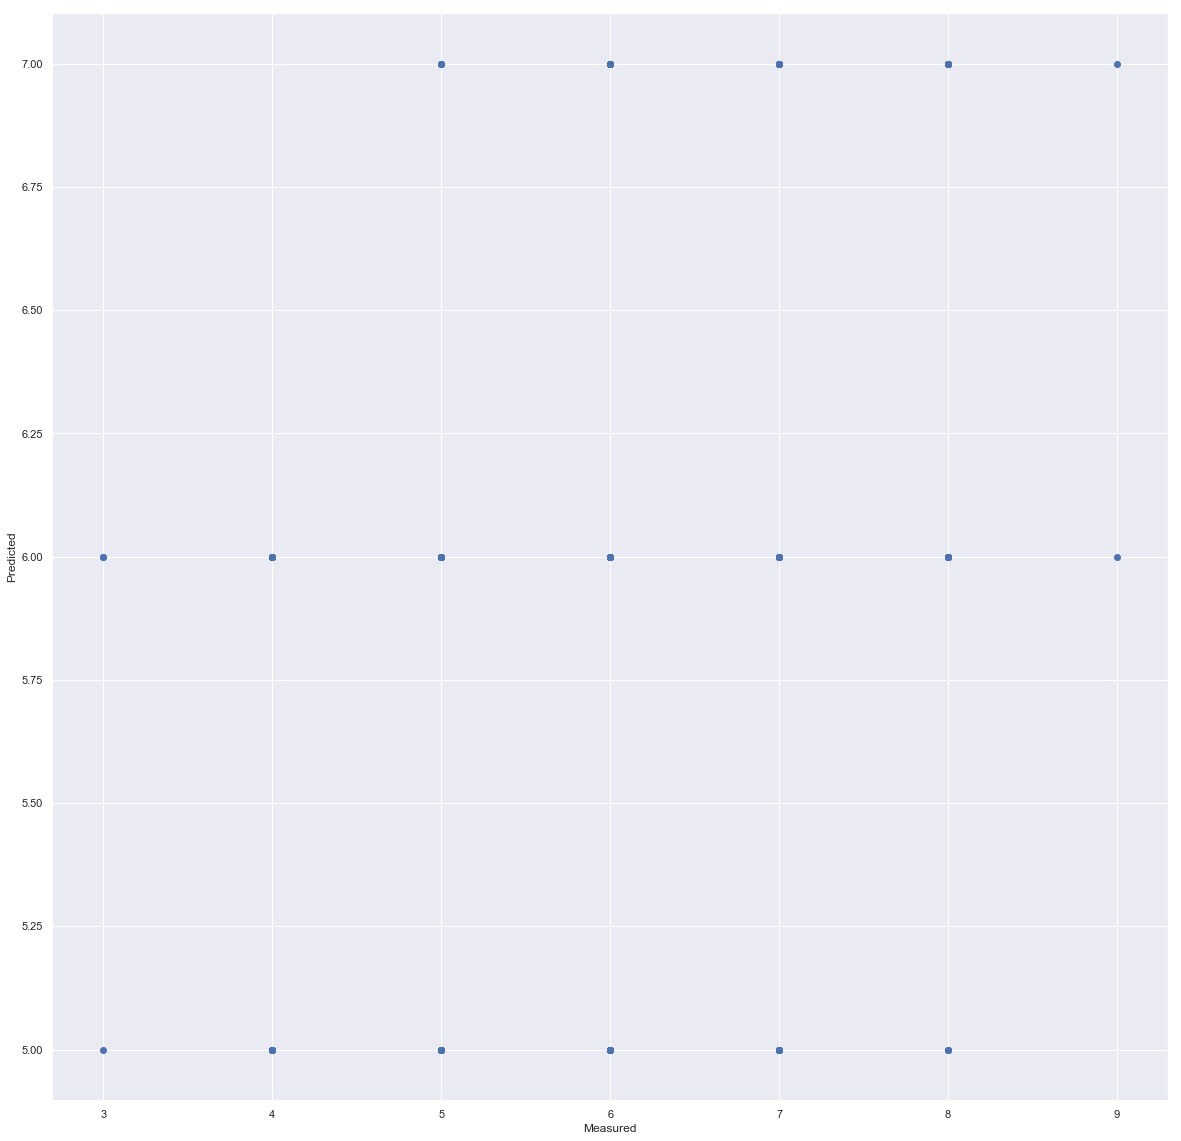

In [197]:
fig, ax = plt.subplots()
ax.scatter(y_test_values, y_pred_values)
#ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()